<a href="https://colab.research.google.com/github/krislars/compuphys/blob/main/Waves_forward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebooks starts the pulse moving in the forward direction.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interactive, interact
import ipywidgets as widgets

In [ ]:
size = 100
dx = 0.1
dt = 0.1
v = 0.5
r = v*dt/dx
r

0.5

Explore the initial conditions:

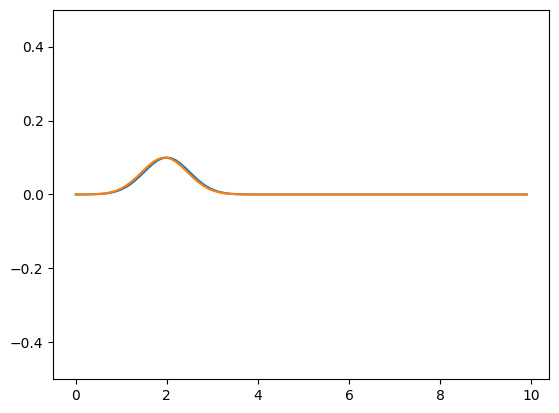

In [ ]:
x = np.arange(size)*dx
ynow = np.zeros(size)
yprev = np.zeros(size)
ynext = np.zeros(size)

x_start = 2.
sigma = 0.5
amp = 0.1
ynow[1:-1] = amp*np.exp(-(x[1:-1]-x_start)**2/(2*sigma**2)) # do not update ends
yprev[1:-1] = amp*np.exp(-(x[1:-1]-(x_start-v*dt))**2/(2*sigma**2)) # do not update ends

fig,ax = plt.subplots(1,1)
ax.plot(x,ynow)
ax.plot(x,yprev)
ax.set_ylim(-0.5,0.5)
fig.show()

In [ ]:
def propagate(t):
    ynow = np.zeros(size)
    yprev = np.zeros(size)
    ynext = np.zeros(size)
    ynow[1:-1] = amp*np.exp(-(x[1:-1]-x_start)**2/(2*sigma**2)) # do not update ends
    yprev[1:-1] = amp*np.exp(-(x[1:-1]-(x_start-v*dt))**2/(2*sigma**2)) # do not update ends
    plt.plot(x,ynow,':')
    if t == 0:
        plt.plot(x,ynow)
    else:
        for i in range(int(t/dt)):
            for j in range(1,size-1):
                ynext[j] = -yprev[j]+2*ynow[j]*(1-r**2) + r**2*(ynow[j+1] + ynow[j-1])
            yprev = np.copy(ynow)
            ynow = np.copy(ynext)
        plt.plot(x,ynext)
    plt.ylim(-0.5,0.5)
    plt.show()

In [ ]:
interact(propagate, t=widgets.IntSlider(min=0, max=50, value=0));

interactive(children=(IntSlider(value=0, description='t', max=50), Output()), _dom_classes=('widget-interact',…